In [1]:
from array import array
import numpy as np
import math

# Projectile Motion with Air Resistance

Projectile motion in two dimensions is governed by a fairly simple set of coupled differential equations:

The acceleration components are defined as:

$$ a_x(t) = \frac{F_x(t)}{m} = \frac{d v_x(t)}{dt}$$
$$ a_y(t) = \frac{F_y(t)}{m} = \frac{d v_y(t)}{dt}$$

The velocity components are defined as:

$$ v_x(t) = \frac{d x(t)}{dt}$$
$$ v_y(t) = \frac{d y(t)}{dt}$$

In the previous example, with no air resistance, we saw that for these differential equations, the midpoint method gave the most accurate numerical answers, for a given timestep.  We will use the midpoint method again here, but we will need to modify the acceleration components to include the effects of air resistance.  The force of air resistance is given by:

$$ F_{air} = -\frac{1}{2} C_d \rho A v^2 $$

where $C_d$ is the drag coefficient, $\rho$ is the density of air, $A$ is the cross-sectional area of the projectile, and $v$ is the magnitude of the velocity of the projectile.  The direction of the force is opposite the direction of the velocity.  The acceleration components are then:

$$ a_x(t) = \frac{F_x(t)}{m} = \frac{d v_x(t)}{dt} = -\frac{1}{2} C_d \rho A \frac{v_x(t)}{m} v(t)$$
$$ a_y(t) = \frac{F_y(t)}{m} = \frac{d v_y(t)}{dt} = -\frac{1}{2} C_d \rho A \frac{v_y(t)}{m} v(t) - g$$

where $g$ is the acceleration due to gravity.  We can simplify these equations by defining a constant:

$$ k = -\frac{1}{2} C_d \rho A \frac{1}{m}$$

and then the acceleration components become:

$$ a_x(t) = \frac{d v_x(t)}{dt} = k v(t) v_x(t)$$
$$ a_y(t) = \frac{d v_y(t)}{dt} = k v(t) v_y(t) - g$$

We can then use the midpoint method to solve these differential equations.

As before, we will always need to know a set of initial conditions:  the initial velocity in the x- and y-directions, and the initial position in the x- and y-directions:  $v_x(0) = v_{x0}, v_y(0) = v_{y0}, x(0) = x_0, y(0) = y_0$

In [2]:
# Initial Conditions
speed = 100.0*0.44704 # initial speed in m/s
theta_array = np.linspace(30.0,45.0,101)
y1 = 1.0


# Other constants - baseball
Cd = 0.30 # drag coefficient
diameter = (.073+.075)/2.0 # diameter of projectile in meters
area = np.pi*(diameter/2.0)**2 # cross sectional area of projectile
grav = 9.81 # gravitational acceleration
mass = (0.142+0.149)/2.0 # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass
Pi = math.pi

print("Air resistance constant = %f" % air_const)

prange = []
prangeTheory = []

Air resistance constant = -0.005431


In [3]:
for theta in theta_array:
    r1 = array('d')
    v1 = array('d')
    r = array('d')
    v = array('d')
    accel = array('d')

    r1.append(0)    
    r1.append(y1)
    v1.append(speed*math.cos(theta*Pi/180.0))
    v1.append(speed*math.sin(theta*Pi/180.0))

    r.append(r1[0])
    r.append(r1[1])
    v.append(v1[0])
    v.append(v1[1])
    accel.append(0)
    accel.append(0)
    
    # Setup arrays for Euler and Euler-Cromer Methods
    re = array('d')
    ve = array('d')
    accele = array('d')

    re.append(r1[0])
    re.append(r1[1])
    ve.append(v1[0])
    ve.append(v1[1])
    accele.append(0)
    accele.append(0)

    rec = array('d')
    vec = array('d')
    accelec = array('d')

    rec.append(r1[0])
    rec.append(r1[1])
    vec.append(v1[0])
    vec.append(v1[1])
    accelec.append(0)
    accelec.append(0)
    
    tau = 0.0002 # timestep in seconds
    maxStep = 1000000 # maximum number of steps

    xplot = array('d')
    yplot = array('d')
    xplote = array('d')
    yplote = array('d')
    xplotec = array('d')
    yplotec = array('d')
    xNoAir = array('d')
    yNoAir = array('d')
    time = array('d')
    timee = array('d')
    timeec = array('d')
    timeNoAir = array('d')
    
    endtime = 0
    nelements = 0
    for iStep in range(1,maxStep+1):
    
        t = (iStep-1)*tau
        
        xplot.append(r[0])
        yplot.append(r[1])
        xplote.append(re[0])
        yplote.append(re[1])
        xplotec.append(rec[0])
        yplotec.append(rec[1])
        xNoAir.append(r1[0]+v1[0]*t)
        yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    
        timeNoAir.append(t)
        time.append(t)
        timee.append(t)
        timeec.append(t)
    
        # Euler Method
        normVe = math.sqrt(ve[0]*ve[0]+ve[1]*ve[1])
        accele[0]=air_const*normVe*ve[0]
        accele[1]=air_const*normVe*ve[1]-grav
        re[0] = re[0] + tau*ve[0]
        re[1] = re[1] + tau*ve[1]
        ve[0] = ve[0] + tau*accele[0]
        ve[1] = ve[1] + tau*accele[1]
    
        # Euler-Cromer Method
        normVec = math.sqrt(vec[0]*vec[0]+vec[1]*vec[1])
        accelec[0]=air_const*normVec*vec[0]
        accelec[1]=air_const*normVec*vec[1]-grav
        vec[0] = vec[0] + tau*accelec[0]
        vec[1] = vec[1] + tau*accelec[1]    
        rec[0] = rec[0] + tau*vec[0]
        rec[1] = rec[1] + tau*vec[1]
    
        # MidPoint Method
        normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
        accel[0]=air_const*normV*v[0]
        accel[1]=air_const*normV*v[1]-grav
        vxnew = v[0] + tau*accel[0]
        vynew = v[1] + tau*accel[1]
        r[0] = r[0] + tau*(v[0] + vxnew)/2.0
        r[1] = r[1] + tau*(v[1] + vynew)/2.0
        v[0] = vxnew
        v[1] = vynew    
    
        #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
        #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
        if (r[1] < 0 and v[1] < 0):
            xplot.append(r[0])
            yplot.append(r[1])
            xplote.append(re[0])
            yplote.append(re[1])
            xplotec.append(rec[0])
            yplotec.append(rec[1])
            time.append(tau*iStep)
            timee.append(tau*iStep)
            timeec.append(tau*iStep)
            endtime = tau*iStep
            nelements = iStep
            break
        
    #print ("Maximum range is %f meters." % r[0])
    #print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
    #print (" ")
    prange.append(r[0])
    prangeTheory.append(speed*speed/grav*math.sin(2.0*theta*Pi/180.0))

    #print ("Time of flight is %f seconds." % endtime)
    #print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
    #print (" ")

    max_y = np.amax(yNoAir)+1
    max_x = np.amax(xNoAir)+1
    max_t = np.amax(time)+1

    #print ("Max y = %f" % max_y)
    #print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
    #print (" ")


    #print ("Number of elements = %d" % nelements)

Maximum range is 117.142915 meters at 40.500000 degrees.
Maximum range in feet is 384.327163


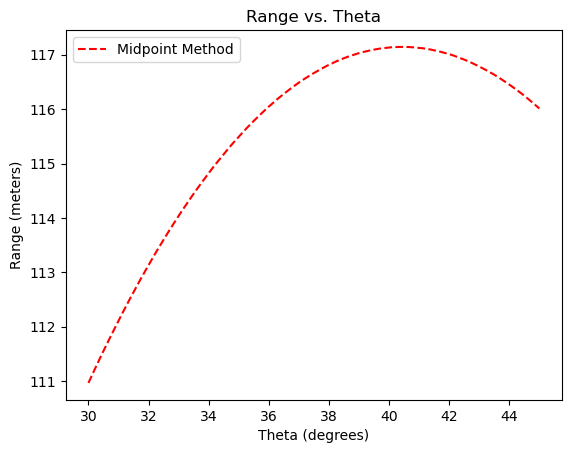

In [6]:
import matplotlib.pyplot as plt
plt.plot(theta_array,prange,'r--',label='Midpoint Method')
#plt.plot(theta_array,prangeTheory,'b-',label='Theory')
plt.xlabel('Theta (degrees)')
plt.ylabel('Range (meters)')
plt.title('Range vs. Theta')
plt.legend()

idx = np.argmax(prange)
print ("Maximum range is %f meters at %f degrees." % (prange[idx],theta_array[idx]))
print("Maximum range in feet is %f" % (prange[idx]*3.28084))


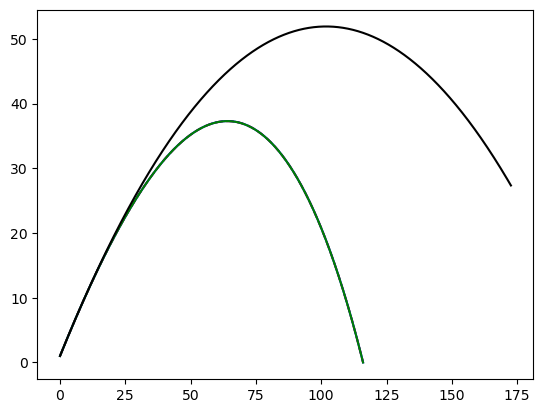

In [5]:
plt.plot(xplot,yplot,'r--',label='Midpoint Method')
plt.plot(xplote,yplote,'b-',label='Euler Method')
plt.plot(xplotec,yplotec,'g-',label='Euler-Cromer Method')
plt.plot(xNoAir,yNoAir,'k-',label='No Air Resistance')